# IBM Data Science Certification - Capstone Project - Week 3
## Segmenting and Clustering - Toronto Postal Code and Neighborhood
### Carlos Alexandre Nako

This notebook is for the Capstone Project as part of the IBM Data Science Certification to showcase how to use segmenting and clustering.

In [1]:
import pandas as pd
import numpy as np
!pip install bs4
import requests
from bs4 import BeautifulSoup

In [2]:
html_data = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')
beautiful_soup = BeautifulSoup(html_data.content, 'html.parser')
table_contents=[]
table=beautiful_soup.find('table')
for row in table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
        cell['PostalCode'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        table_contents.append(cell)

# print(table_contents)
df=pd.DataFrame(table_contents)
df['Borough']=df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})

df.head()


,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government


In [3]:
!pip install geocoder
import geocoder # import geocoder

In [5]:
g = geocoder.google('Toronto, Ontario')
g

<[REQUEST_DENIED] Google - Geocode [empty]>

#### Remark
Google Geocoding API is not free anymore.

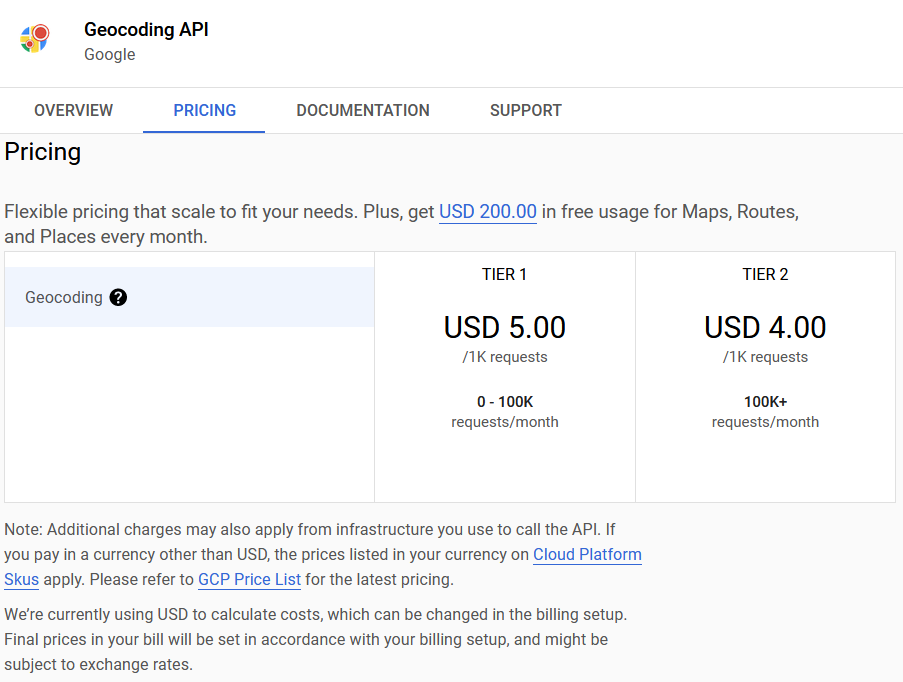

In [3]:
csv_path = 'https://cocl.us/Geospatial_data'
coord = pd.read_csv(csv_path)
coord.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [4]:
Location = df.join(coord.set_index('Postal Code'),on='PostalCode')
Location.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494


In [5]:
Location.shape

(103, 5)